**Name:** Luong Nguyen  
**Student ID:** 1504210 . 
### Assignment 7 - Text analytics

### Web scraping

Seinfeld is my favorite TV show. I want to get the script of an episode, then do the sentiment analysis task on it. 

In [0]:
from bs4 import BeautifulSoup
import requests
import re

In [30]:
# scrape the script of episode 51, The Contest, which is considered one of the best Seinfeld episodes
r = requests.get('http://www.seinology.com/scripts/script-51.shtml') 
page_content = BeautifulSoup(r.content, "html.parser")
text = page_content.get_text()

# script starts after a line of 
# ==================================================================
# script content
# 'The end' | 'The End' | 'THE END' + \s | \s\n
pattern = re.compile(r'={30,}\n([^=]*)the end\W*\n', re.IGNORECASE)
match = pattern.search(text)
content = match.group(1)

# replace curly quotes and apostrophes
content = re.sub(r'(“|”)', r'"', content) 
content = re.sub(r'(‘|’)', r"'", content) 

# remove empty line and strip the script
lines = content.split('\n')

text = ''
for line in lines:
  if line.strip():
    text += (line.strip() + '\n')
    
print(text)

[Setting: Monk's Coffee shop]
(Jerry and Kramer are sitting opposite Elaine at a booth, eating lunch)
JERRY: (To Elaine) Let me ask you a question.
ELAINE: Mm-hm.
JERRY: You're a hostage, captured by terrorists-
ELAINE: (Smiling, chewing) Who, me?
JERRY: You, anybody - whatever. You're in the little room, you're chained to the floor, you're there for a long time.. do you think they would ever consider doing the laundry?
ELAINE: (Matter-of-factly) They have to, it's in the Geneva Convention.
KRAMER: (Imitating a Turkish terrorist) You! Take off your socks, your pants, your underwear. We're doing the wash. C'mon! Take it off, take it off!
(Jerry and Elaine both laugh at Kramer's impression as George slowly enters. He's in a melancholy state)
KRAMER: Hey, Georgie.
JERRY AND ELAINE: Hi.
(George sits down next to Elaine - opposite Kramer)
JERRY: (To George) What's the matter?
GEORGE: (Slowly shakes his head) My mother caught me.
JERRY: "Caught" you? Doing what?
GEORGE: You know. (All three 

### Sentiment analysis

In [0]:
import nltk
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [40]:
# Tokenize
nltk.download('stopwords')
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

lines = text.split('\n')
tokens = []
for line in lines:
  line_tokens = line.split()
  line_tokens=[token.lower() for token in line_tokens if token.isalpha()]
  # remove stopwords and Lemmatize 
  line_tokens=[lemmatizer.lemmatize(token) for token in line_tokens if token not in sw]
  if line_tokens:
    tokens.append(line_tokens) 
  
print(tokens[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[['coffee'], ['kramer', 'sitting', 'opposite', 'elaine', 'eating'], ['let', 'ask'], ['captured'], ['anybody', 'little', 'chained', 'long', 'think', 'would', 'ever', 'consider']]


In [0]:
# import positive and negative words
pos = open('positive-words.txt','r').read().split()
neg = open('negative-words.txt','r', encoding="latin-1").read().split()

In [0]:
# calculate sentiment score for each line
scores = []

for line in tokens:
  score = 0
  for token in line:
    if token in pos: 
      score += 1
    elif token in neg:
      score -= 1
  scores.append(score)

In [0]:
# calculate delta3
import numpy as np

N = 7
buffer = [0 for i in range(N//2)]
scores = buffer + scores + buffer
delta3 = np.convolve(scores, np.ones((N,))/N, mode='valid')

In [72]:
# example
for i in range(15):
  print(tokens[i], scores[i], delta3[i])
  

['coffee'] 0 0.0
['kramer', 'sitting', 'opposite', 'elaine', 'eating'] 0 0.0
['let', 'ask'] 0 0.0
['captured'] 0 0.0
['anybody', 'little', 'chained', 'long', 'think', 'would', 'ever', 'consider'] 0 -0.2857142857142857
['geneva'] 0 -0.2857142857142857
['turkish', 'take', 'take', 'take'] 0 -0.2857142857142857
['elaine', 'laugh', 'impression', 'george', 'slowly', 'melancholy'] 0 -0.42857142857142855
['jerry'] 0 -0.42857142857142855
['sits', 'next', 'elaine', 'opposite'] 0 -0.42857142857142855
['shake', 'mother', 'caught'] -2 -0.42857142857142855
['three', 'give', 'blank'] 0 -0.14285714285714285
['face'] 0 0.0
['caught'] -1 0.0
['laugh'] 0 0.2857142857142857


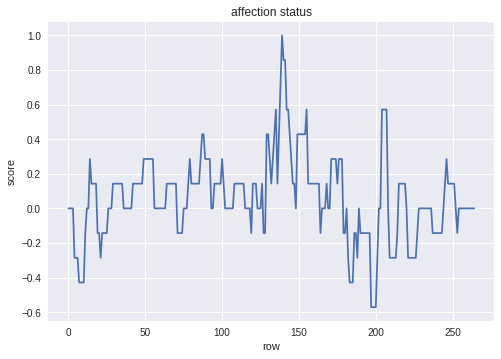

In [77]:
# plot 
import matplotlib.pyplot as plt

plt.plot(delta3)
plt.xlabel('row')
plt.ylabel('score')
plt.title('affection status')
plt.show()